In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from warnings import filterwarnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop('math_score',axis=1)

In [5]:
y=df['math_score']

In [6]:
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer = StandardScaler()
oh_trasformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_trasformer,cat_feature),
        ('StanderScaler',numeric_tranformer,num_feature)
    ]
)

In [17]:
num_feature

Index(['reading_score', 'writing_score'], dtype='object')

In [18]:
cat_feature

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [7]:
X=preprocessor.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(800, 19)

### Model Evaluation

In [10]:
def model_evaluation(true,predict):
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    r2_square = r2_score(true,predict)
    
    return mae,mse,r2_square 
    

In [11]:
models={
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'DecisionTreeRegression' : DecisionTreeRegressor(),
    'KNearestNeighbour' : KNeighborsRegressor(),
    'AdaboostRegressor' : AdaBoostRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'SVR' : SVR(),
    'CatBoostRegressor' : CatBoostRegressor(verbose=False),
    'XgboostRegressor' : XGBRegressor()
}


model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    
    # Make Prediction
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    # Evaluate Model Train and Test
    model_train_mae,model_train_mse,model_train_r2_square = model_evaluation(y_train,y_train_predict)
    model_test_mae,model_test_mse,model_test_r2_square = model_evaluation(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training Dataset')
    print(f'- Mean Square Error {model_train_mse}')
    print(f'- Mean Absolute Error {model_train_mae}')
    print(f'- R2_square {model_train_r2_square}')
    
    print('------------------------------')
    
    print('Model Performance for Test Dataset')
    print(f'- Mean Square Error {model_test_mse}')
    print(f'- Mean Absolute Error {model_test_mae}')
    print(f'- R2_square {model_test_r2_square}')
    
    print('------------------------------')
    r2_list.append(model_test_r2_square)
    
    print('='*30)
    print('\n')
    

LinearRegression
Model Performance for Training Dataset
- Mean Square Error 28.33487038064859
- Mean Absolute Error 4.266711846071957
- R2_square 0.8743172040139593
------------------------------
Model Performance for Test Dataset
- Mean Square Error 29.095169866715487
- Mean Absolute Error 4.21476314247485
- R2_square 0.8804332983749565
------------------------------


Ridge
Model Performance for Training Dataset
- Mean Square Error 28.337788233082442
- Mean Absolute Error 4.26498782372598
- R2_square 0.8743042615212909
------------------------------
Model Performance for Test Dataset
- Mean Square Error 29.056272192348274
- Mean Absolute Error 4.211100688014259
- R2_square 0.8805931485028738
------------------------------


Lasso
Model Performance for Training Dataset
- Mean Square Error 43.47840400585579
- Mean Absolute Error 5.206302661246526
- R2_square 0.8071462015863456
------------------------------
Model Performance for Test Dataset
- Mean Square Error 42.5064168384116
- Mean 

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,LinearRegression,0.880433
9,CatBoostRegressor,0.851632
6,AdaboostRegressor,0.850700
7,RandomForestRegressor,0.849946
10,XgboostRegressor,0.827797
2,Lasso,0.825320
5,KNearestNeighbour,0.783497
4,DecisionTreeRegression,0.741163
3,ElasticNet,0.739624


### Linear Regression

In [13]:
linear_model = LinearRegression()
linear_model=linear_model.fit(X_train,y_train)
y_predict = linear_model.predict(X_test)
score = r2_score(y_test,y_predict)*100
print(f'Accuracy Score {score}')

Accuracy Score 88.04332983749565


### Plot y_pred vs y_test

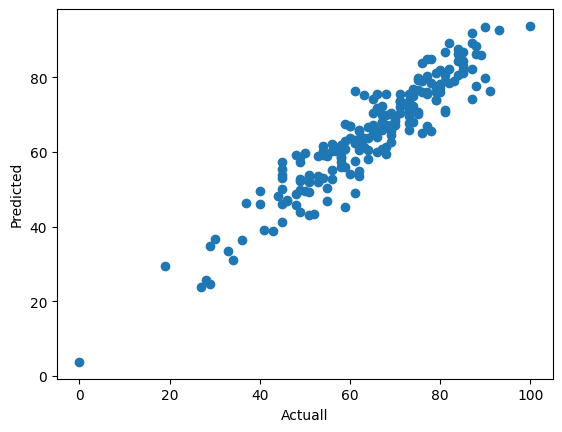

In [14]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actuall')
plt.ylabel('Predicted')
plt.show()

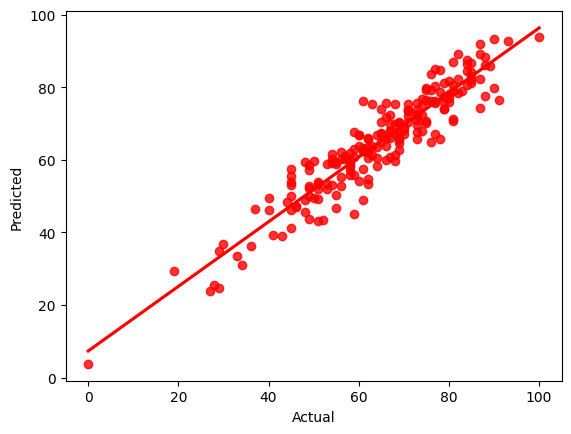

In [15]:
sns.regplot(x=y_test,y=y_predict,ci=None,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Difference between Actual and Predicted Values

In [16]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict,'Difference':y_test-y_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
